In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('attacks.csv',encoding='latin1')
data_list_aus = pd.read_csv('list_coor_australia.csv',encoding='latin1')

#Provoked and Unprovoked attacks
data_unprovoked = data[data['Type'] ==  'Unprovoked']
data_provoked = data[data['Type'] ==  'Provoked']


dangerous_sharks = data_unprovoked['Species '].value_counts()
dangerous_sharks = dangerous_sharks.sort_values(ascending=False).head()

#Children vs Adults variables
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data_children = data[data['Age'] <= 18]
data_adults = data[data['Age'] > 18]
attacks_children = data_children['Age'].count()
attacks_adults = data_adults['Age'].count()

#Fatal attacks variables
provoked_fatal = data[(data['Type'] == 'Provoked') & (data['Fatal (Y/N)'] == 'Y')]
unprovoked_fatal = data[(data['Type'] == 'Unprovoked') & (data['Fatal (Y/N)'] == 'Y')]
fatal_provoked = provoked_fatal['Fatal (Y/N)'].count()
fatal_unprovoked = unprovoked_fatal['Fatal (Y/N)'].count()

#Top 5 activities variables
top_two_activities = data['Activity'].value_counts().nlargest(5)
 


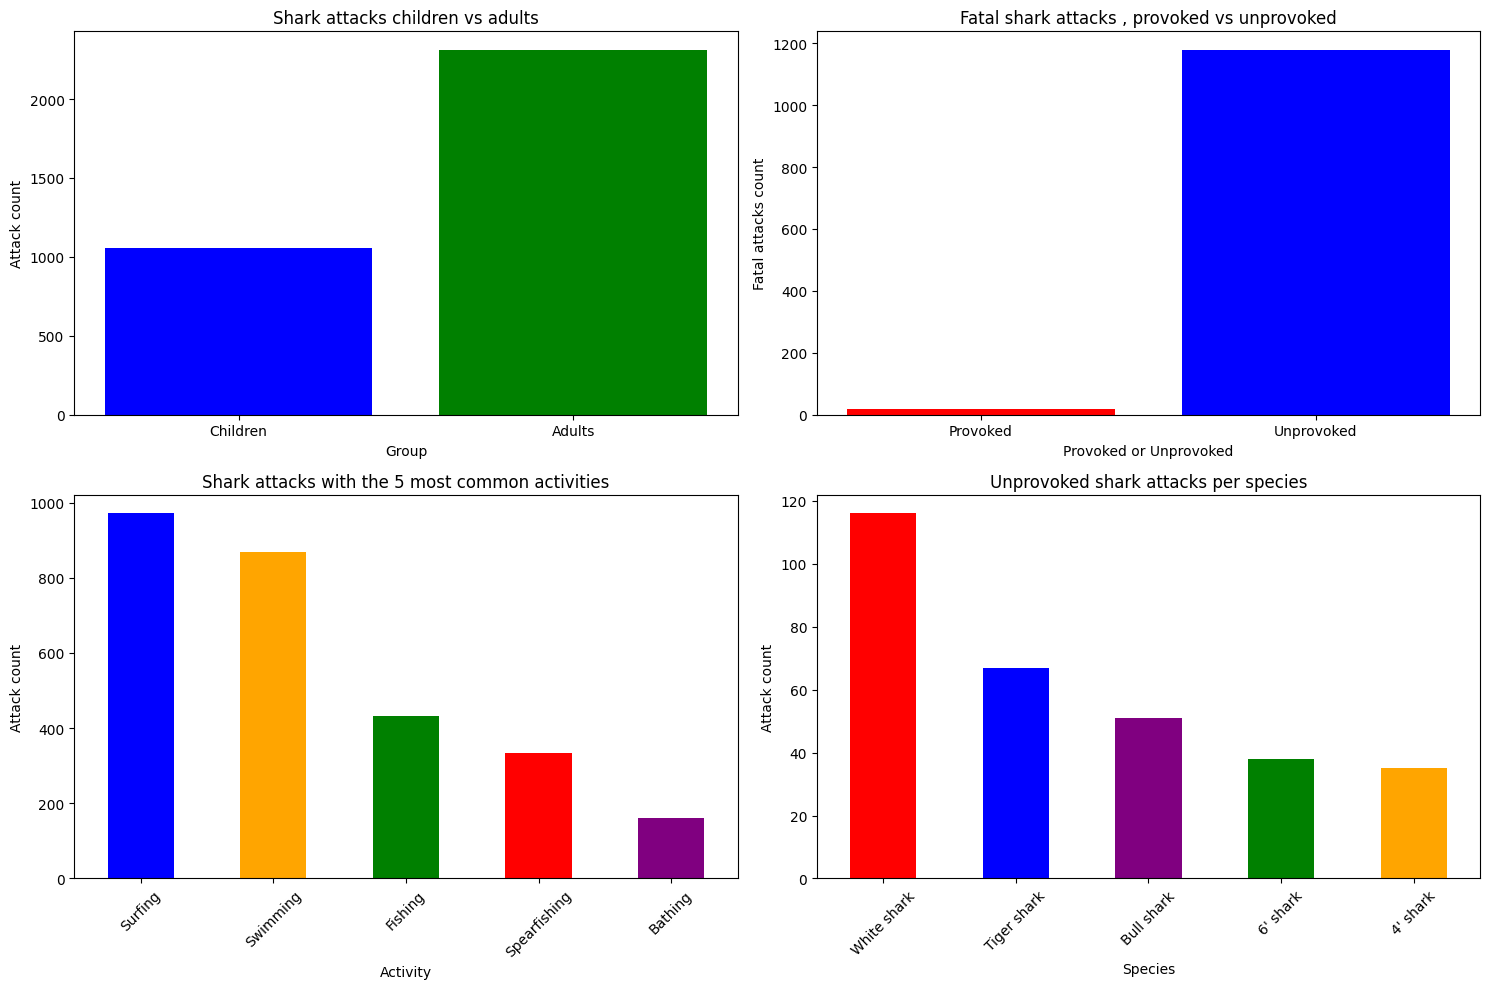

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Q 1 = Are children more likely to be attacked by sharks? 
#A 1 = No they are less likely to be attacked by sharks
# Plot 1: Shark attacks children vs adults
axs[0, 0].bar(['Children', 'Adults'], [attacks_children, attacks_adults], color=['blue', 'green'])
axs[0, 0].set_title('Shark attacks children vs adults')
axs[0, 0].set_xlabel('Group')
axs[0, 0].set_ylabel('Attack count')
#----------------------------------------------------------------------------------------------------------------------------------------------------

#Q 2 = Are shark attacks where sharks were provoked more or less dangerous? 
#A 2 = Unprovoked attacks are more dangerous
# Plot 2: Shark attacks, Provoked vs Unprovoked
axs[0, 1].bar(['Provoked', 'Unprovoked'], [fatal_provoked, fatal_unprovoked], color=['red', 'blue'])
axs[0, 1].set_title('Fatal shark attacks , provoked vs unprovoked')
axs[0, 1].set_xlabel('Provoked or Unprovoked')
axs[0, 1].set_ylabel('Fatal attacks count')
#----------------------------------------------------------------------------------------------------------------------------------------------------

#Q 3 = What are the most common activities that lead to shark attacks?
#A 3 = Surfing and Swimming
# Plot 3: Shark attacks with the 5 most common activities
top_two_activities.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'], ax=axs[1, 0])
axs[1, 0].set_title('Shark attacks with the 5 most common activities')
axs[1, 0].set_xlabel('Activity')
axs[1, 0].set_ylabel('Attack count')
axs[1, 0].tick_params(axis='x', rotation=45)
#----------------------------------------------------------------------------------------------------------------------------------------------------

#Q 4 = What are the most dangerous types of sharks to humans?
#A 4= White Shark 
# Plot 4: Unprovoked shark attacks per species
dangerous_sharks.plot(kind='bar', color=['red', 'blue', 'purple', 'green', 'orange'], ax=axs[1, 1])
axs[1, 1].set_title('Unprovoked shark attacks per species')
axs[1, 1].set_xlabel('Species')
axs[1, 1].set_ylabel('Attack count')
axs[1, 1].tick_params(axis='x', rotation=45)
#----------------------------------------------------------------------------------------------------------------------------------------------------

plt.tight_layout()
plt.show()